In [1]:
import tensorflow as tf
from tensorflow.python.client import device_lib
gpus = tf.config.list_physical_devices('GPU')
if gpus:
    # 텐서플로가 첫 번째 GPU만 사용하도록 제한
    try:
        tf.config.set_visible_devices(gpus[0], 'GPU')
    except RuntimeError as e:
        # 프로그램 시작시에 접근 가능한 장치가 설정되어야만 합니다
        print(e)

In [2]:
import os
from tensorflow.keras import models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout
from tensorflow.keras import optimizers


import numpy as np
import matplotlib.pyplot as plt
import os

In [3]:
pwd

'e:\\Pill Project\\code\\Model'

In [8]:
# 데이터셋 디렉터리 경로
dataset_dir = 'E:\Pill Project\half_data'
train_dir = os.path.join(dataset_dir, 'train')
validation_dir = os.path.join(dataset_dir, 'valid')
# test_dir = os.path.join(dataset_dir, 'test')

# 사진 크기
image_width = 224
image_height = 224

# ImageDataGenerator 초기화
# 0~1 사이로 숫자값 변경
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)
# test_datagen = ImageDataGenerator(rescale=1./255)

# 훈련셋 제너레이터
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(image_width, image_height),
    batch_size=64,
    class_mode='categorical')

# 검증셋 제너레이터
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(image_width, image_height),
    batch_size=64,
    class_mode='categorical')

# 테스트셋 제너레이터
# test_generator = test_datagen.flow_from_directory(
#     test_dir,
#     target_size=(image_width, image_height),
#     batch_size=16,
#     class_mode='categorical')

Found 207360 images belonging to 400 classes.
Found 51840 images belonging to 400 classes.


In [9]:
# 훈련셋에서 배치를 생성
for data_batch, labels_batch in train_generator:
    break

In [10]:
# 데이터 배치의 크기
# (배치개수, 이미지너비, 이미지높이, RGB채널)
data_batch.shape

(64, 224, 224, 3)

In [11]:
# 라벨 배치의 크기
# (배치개수, 카테고리개수)
labels_batch.shape

(64, 400)

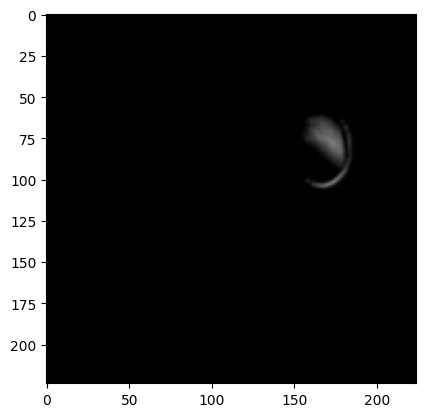

In [12]:
# 첫 번째 이미지 출력
image = data_batch[0]

plt.imshow(image)
plt.show()

In [13]:
# 라벨 이름 목록
labels_list = train_generator.class_indices
labels_list

{'megab': 0,
 'megafree': 1,
 'mell': 2,
 'mellmj': 3,
 'merdmem': 4,
 'mesarj': 5,
 'mess': 6,
 'mexta': 7,
 'miarll': 8,
 'mican': 9,
 'micat': 10,
 'middle': 11,
 'miplus': 12,
 'mirr': 13,
 'miwon': 14,
 'mlrra': 15,
 'mmeega': 16,
 'mmoss': 17,
 'mmtejrl': 18,
 'modim': 19,
 'mona': 20,
 'monca': 21,
 'moncast': 22,
 'moni': 23,
 'monimet': 24,
 'monnte': 25,
 'monol': 26,
 'monolr': 27,
 'monot': 28,
 'monotinj': 29,
 'monrus': 30,
 'monte': 31,
 'montru': 32,
 'montte': 33,
 'morare': 34,
 'mosa': 35,
 'motrton': 36,
 'mteaj': 37,
 'mucote': 38,
 'multi': 39,
 'my': 40,
 'myrep': 41,
 'naevi': 42,
 'napler': 43,
 'nate': 44,
 'nebi': 45,
 'nebot': 46,
 'neo': 47,
 'neoma': 48,
 'neor': 49,
 'nepejil': 50,
 'newba': 51,
 'newbas': 52,
 'newbast': 53,
 'newfj': 54,
 'newfram': 55,
 'newjapin': 56,
 'newjeong': 57,
 'newp': 58,
 'newpo': 59,
 'newro': 60,
 'ninetil': 61,
 'njeong': 62,
 'nlos': 63,
 'nobasc': 64,
 'noenbell': 65,
 'nol': 66,
 'nomarok': 67,
 'nomrll': 68,
 'nonable

In [14]:
# 라벨 이름 목록 스왑
labels_list = dict((value, key) for key, value in labels_list.items())
labels_list

{0: 'megab',
 1: 'megafree',
 2: 'mell',
 3: 'mellmj',
 4: 'merdmem',
 5: 'mesarj',
 6: 'mess',
 7: 'mexta',
 8: 'miarll',
 9: 'mican',
 10: 'micat',
 11: 'middle',
 12: 'miplus',
 13: 'mirr',
 14: 'miwon',
 15: 'mlrra',
 16: 'mmeega',
 17: 'mmoss',
 18: 'mmtejrl',
 19: 'modim',
 20: 'mona',
 21: 'monca',
 22: 'moncast',
 23: 'moni',
 24: 'monimet',
 25: 'monnte',
 26: 'monol',
 27: 'monolr',
 28: 'monot',
 29: 'monotinj',
 30: 'monrus',
 31: 'monte',
 32: 'montru',
 33: 'montte',
 34: 'morare',
 35: 'mosa',
 36: 'motrton',
 37: 'mteaj',
 38: 'mucote',
 39: 'multi',
 40: 'my',
 41: 'myrep',
 42: 'naevi',
 43: 'napler',
 44: 'nate',
 45: 'nebi',
 46: 'nebot',
 47: 'neo',
 48: 'neoma',
 49: 'neor',
 50: 'nepejil',
 51: 'newba',
 52: 'newbas',
 53: 'newbast',
 54: 'newfj',
 55: 'newfram',
 56: 'newjapin',
 57: 'newjeong',
 58: 'newp',
 59: 'newpo',
 60: 'newro',
 61: 'ninetil',
 62: 'njeong',
 63: 'nlos',
 64: 'nobasc',
 65: 'noenbell',
 66: 'nol',
 67: 'nomarok',
 68: 'nomrll',
 69: 'non

In [15]:
# 첫 번째 라벨 이름 출력
labels_list[np.argmax(labels_batch[0])]

'rema'

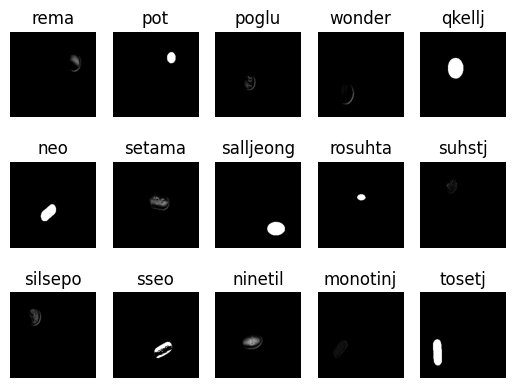

In [16]:
# 출력할 크기 설정
rows = 3
columns = 5

# 사진과 라벨 이름을 목록으로 출력
for num, img in enumerate(data_batch):
    if num >= rows * columns:
        break

    plt.subplot(rows, columns, num + 1)
    plt.title(labels_list[np.argmax(labels_batch[num])])
    plt.axis('off')
    plt.imshow(img)

# 기존 모델

In [17]:
# 기존 모델

model = Sequential()

# Layer 1
model.add(Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(BatchNormalization())

# Layer 2
model.add(Conv2D(256, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(BatchNormalization())

# Layer 3
model.add(Conv2D(384, (3, 3), activation='relu', padding='same'))

# Layer 4
model.add(Conv2D(384, (3, 3), activation='relu', padding='same'))

# Layer 5
model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(BatchNormalization())

# Flatten
model.add(Flatten())

# Layer 6
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

# Layer 7
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

# Output layer
model.add(Dense(400, activation='softmax'))

# 두번째 모델

In [20]:
# 두 번째 모델
# Layer 5 Conv2D, pool_size 변경
model = Sequential()

# Layer 1
model.add(Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(BatchNormalization())

# Layer 2
model.add(Conv2D(256, (5, 5), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
model.add(BatchNormalization())

# Layer 3
model.add(Conv2D(384, (3, 3), activation='relu', padding='same'))

# Layer 4
model.add(Conv2D(384, (3, 3), activation='relu', padding='same'))

# Layer 5, pool_size(3, 3) -> pool_size(2, 2)로 변경
model.add(Conv2D(256, (2, 2), activation='relu', padding='same'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
model.add(BatchNormalization())

# Flatten
model.add(Flatten())

# Layer 6
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

# Layer 7
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))

# Output layer, 클래스 개수
model.add(Dense(400, activation='softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 26, 26, 96)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 96)        384       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 26, 26, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 256)       0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 12, 12, 256)       1024      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 384)       8

In [19]:
# Compile the model
model.compile(optimizer=optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [20]:
batch_size = 64
epochs = 120

In [21]:
# Train the model
import time

start_time = time.time()

history = model.fit(train_generator,
          steps_per_epoch=train_generator.samples // batch_size,
          epochs=epochs,
          validation_data=validation_generator,
          validation_steps=validation_generator.samples // batch_size)

end_time = time.time()
elapsed_time = end_time - start_time
print(f"The model was trained in: {elapsed_time:.2f} seconds")

Epoch 1/120
3240/3240 [==============================] - 3701s 1s/step - loss: 4.9185 - accuracy: 0.0479 - val_loss: 3.6111 - val_accuracy: 0.1126
Epoch 2/120
3240/3240 [==============================] - 295s 91ms/step - loss: 2.2674 - accuracy: 0.3521 - val_loss: 2.1954 - val_accuracy: 0.3671
Epoch 3/120
3240/3240 [==============================] - 234s 72ms/step - loss: 1.3320 - accuracy: 0.5779 - val_loss: 1.4174 - val_accuracy: 0.5503
Epoch 4/120
3240/3240 [==============================] - 232s 72ms/step - loss: 0.9577 - accuracy: 0.6857 - val_loss: 1.1693 - val_accuracy: 0.6226
Epoch 5/120
3240/3240 [==============================] - 231s 71ms/step - loss: 0.7547 - accuracy: 0.7455 - val_loss: 0.5762 - val_accuracy: 0.8026
Epoch 6/120
3240/3240 [==============================] - 224s 69ms/step - loss: 0.6321 - accuracy: 0.7845 - val_loss: 0.9214 - val_accuracy: 0.6967
Epoch 7/120
3240/3240 [==============================] - 228s 70ms/step - loss: 0.5421 - accuracy: 0.8134 - val_l

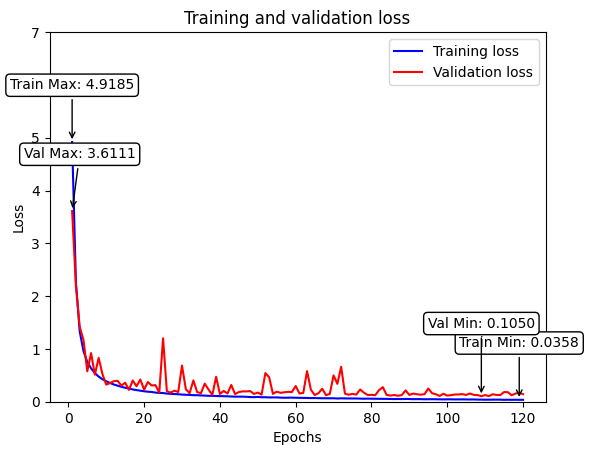

In [22]:
loss = history.history['loss'] # training loss
val_loss = history.history['val_loss'] # validation loss

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Add maximum and minimum values for training loss
max_loss = max(loss)
min_loss = min(loss)
max_loss_epoch = loss.index(max_loss) + 1
min_loss_epoch = loss.index(min_loss) + 1

plt.annotate(f'Train Max: {max_loss:.4f}', xy=(max_loss_epoch, max_loss), xytext=(max_loss_epoch, max_loss+1),
             arrowprops=dict(facecolor='black', arrowstyle='->'), bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'), horizontalalignment='center')
plt.annotate(f'Train Min: {min_loss:.4f}', xy=(min_loss_epoch, min_loss), xytext=(min_loss_epoch, min_loss+1),
             arrowprops=dict(facecolor='black', arrowstyle='->'), bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'), horizontalalignment='center')

# Add maximum and minimum values for validation loss
max_val_loss = max(val_loss)
min_val_loss = min(val_loss)    
max_val_loss_epoch = val_loss.index(max_val_loss) + 1
min_val_loss_epoch = val_loss.index(min_val_loss) + 1

plt.annotate(f'Val Max: {max_val_loss:.4f}', xy=(max_val_loss_epoch, max_val_loss), xytext=(max_val_loss_epoch+2, max_val_loss+1),
             arrowprops=dict(facecolor='black', arrowstyle='->'), bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'), horizontalalignment='center')
plt.annotate(f'Val Min: {min_val_loss:.4f}', xy=(min_val_loss_epoch, min_val_loss), xytext=(min_val_loss_epoch, min_val_loss+1.3),
             arrowprops=dict(facecolor='black', arrowstyle='->'), bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'), horizontalalignment='center')

plt.ylim(0, 7)  # Set the y-axis limits between 0 and 1

plt.show()



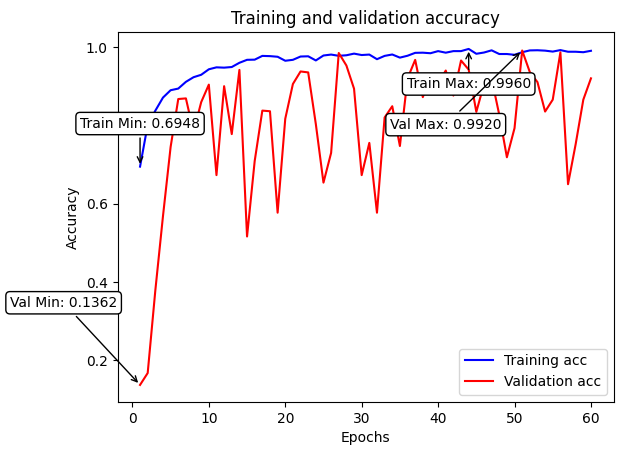

In [25]:
acc = history.history['accuracy'] # training accuracy
val_acc = history.history['val_accuracy'] # validation accuracy

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Add maximum and minimum values for training accuracy
max_acc = max(acc)
min_acc = min(acc)
max_acc_epoch = acc.index(max_acc) + 1
min_acc_epoch = acc.index(min_acc) + 1

plt.annotate(f'Train Max: {max_acc:.4f}', xy=(max_acc_epoch, max_acc), xytext=(max_acc_epoch, max_acc-0.1),
             arrowprops=dict(facecolor='black', arrowstyle='->'), bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'), horizontalalignment='center')
plt.annotate(f'Train Min: {min_acc:.4f}', xy=(min_acc_epoch, min_acc), xytext=(min_acc_epoch, min_acc+0.1),
             arrowprops=dict(facecolor='black', arrowstyle='->'), bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'), horizontalalignment='center')

# Add maximum and minimum values for validation accuracy
max_val_acc = max(val_acc)
min_val_acc = min(val_acc)
max_val_acc_epoch = val_acc.index(max_val_acc) + 1
min_val_acc_epoch = val_acc.index(min_val_acc) + 1

plt.annotate(f'Val Max: {max_val_acc:.4f}', xy=(max_val_acc_epoch, max_val_acc), xytext=(max_val_acc_epoch-10, max_val_acc-0.2),
             arrowprops=dict(facecolor='black', arrowstyle='->'), bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'), horizontalalignment='center')
plt.annotate(f'Val Min: {min_val_acc:.4f}', xy=(min_val_acc_epoch, min_val_acc), xytext=(min_val_acc_epoch-10, min_val_acc+0.2),
             arrowprops=dict(facecolor='black', arrowstyle='->'), bbox=dict(facecolor='white', edgecolor='black', boxstyle='round'), horizontalalignment='center')

plt.show()


In [26]:
# 모델 저장
# model.save('E:\Pill Project\model/AlexNet_10_31_data18_batch16_epoch30_m2.h5')

SAVED_MODEL_PATH = 'E:\Pill Project\model_h5/AlexNet_11_07_data18_batch32_epoch60_m1.h5'
export_path = os.path.join(SAVED_MODEL_PATH)

tf.keras.models.save_model(
  model,
  export_path,
  overwrite=True,
  include_optimizer=True,
  save_format=None,
  signatures=None,
  options=None
)
print('\nSaved model:')


Saved model:


In [11]:
# 저장된 모델 파일 로드
model = models.load_model('c:/Users/LEE/Desktop/app/assets/AlexNet_10_31_data18_batch16_epoch30_m1.tflite')

OSError: SavedModel file does not exist at: c:/Users/LEE/Desktop/app/assets/AlexNet_10_31_data18_batch16_epoch30_m1.tflite\{saved_model.pbtxt|saved_model.pb}

In [29]:
# 테스트셋 평가
results = model.evaluate(test_generator)
results

405/405 [==============================] - 105s 258ms/step - loss: 0.3269 - accuracy: 0.9201


[0.3269144296646118, 0.9200617074966431]

In [30]:
# 테스트셋 예측
results = model.predict(test_generator)
results


array([[0.0000000e+00, 6.7517599e-34, 0.0000000e+00, ..., 0.0000000e+00,
        5.4453811e-36, 6.4441246e-26],
       [4.7104237e-30, 2.4400703e-26, 3.8407118e-29, ..., 1.4998909e-21,
        1.2567253e-27, 1.2149968e-20],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 1.7676101e-31],
       ...,
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [0.0000000e+00, 5.4061440e-34, 0.0000000e+00, ..., 0.0000000e+00,
        1.3848214e-26, 2.4400465e-38],
       [2.7035816e-23, 1.8130349e-10, 1.7338660e-20, ..., 9.5538569e-30,
        6.7365394e-28, 1.1803977e-27]], dtype=float32)

In [31]:
# 예측값을 인덱스로 변환
results = np.argmax(results, 1)
results

array([386, 280, 194, ...,  98, 102, 117], dtype=int64)

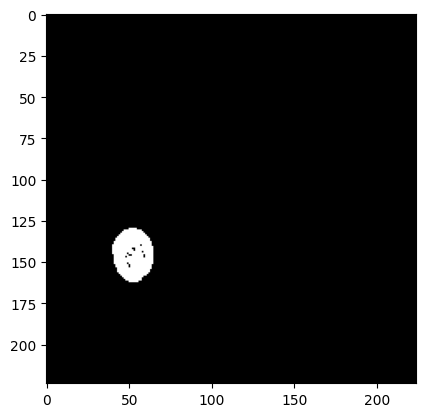

In [32]:
# 테스트셋에서 배치를 생성
for data_batch, labels_batch in test_generator:
    break
    
# 테스트셋의 첫 번째 이미지 출력
image = data_batch[0]

plt.imshow(image)
plt.show()


In [33]:
# 테스트셋 배치 데이터를 예측
results = model.predict(data_batch)

# 테스트셋의 첫 번째 라벨 이름 출력
labels_list[np.argmax(results[0])]


NameError: name 'labels_list' is not defined